# LAB 1: ADVANCED MEDICAL IMAGE PRE-PROCESSING METHODS

The goal of this lab practice is to test some of the advanced image pre-processing algorithms seen in class, to
evaluate the results obtained with real clinical images, and to look for other types of image filtering methods
available in the state-of-the-art.
To check the progress in each of the sections, you can use examples of medical images of your choice (either
from those available in Aula Virtual or obtained from the Internet).

## PREVIOUS ISSUES AND NOISE ADDITION

Since different image filtering techniques will be implemented, it is necessary to evaluate the results obtained
with noisy images. To do this, implement a simple algorithm that adds some of the most important noise
types: Gaussian and impulsive, with different levels of intensity.

In [1]:
from skimage import io 
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from random import gauss, randint

In [2]:
def gaussianNoise(image,sigma):
    im = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            res = -1
            while res < 0 or res > 256 :
                res = gauss(image[i,j], sigma)
            im[i,j] = res 
    return im

def saltAndPepperNoise(image,rang):
    im = image.copy()
    for i in range(rang):
        color = 0
        if(randint(0, 1)): 
            color = 255
        i = randint(0, image.shape[0]-1)
        j = randint(0, image.shape[1]-1)
        im[i,j] = color
    return im
    
def performance(image1, image2): ####!!!!!!!###########
    return 0

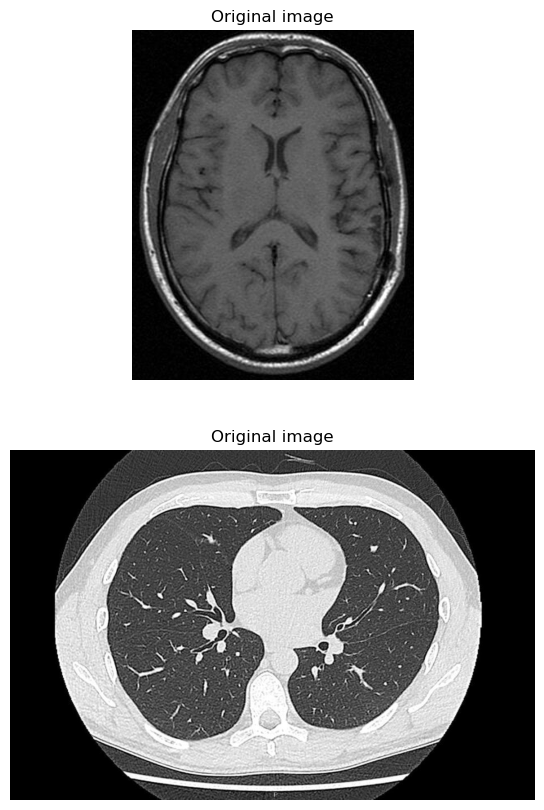

In [3]:
brain = io.imread('Images/Brain.tif')
chest = io.imread('Images/Chest_CT.tif')
images = [brain, chest]

fig, axes = plt.subplots(len(images), 1, figsize=(10, 10), sharex=False, sharey=False)
ax = axes.ravel()

for i in range(len(images)):
    ax[i].set_title("Original image")
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_axis_off()

plt.show()

#### Gaussian noise

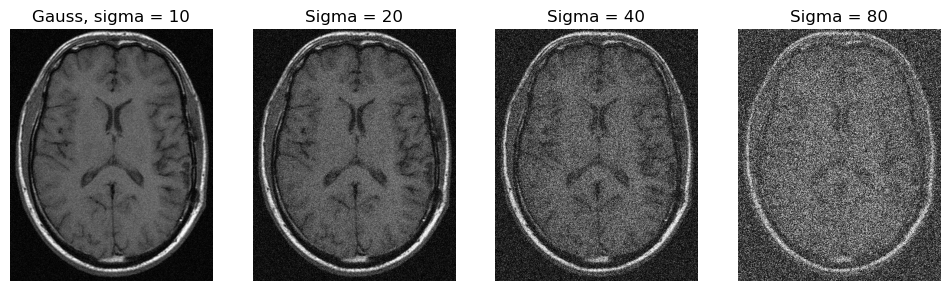

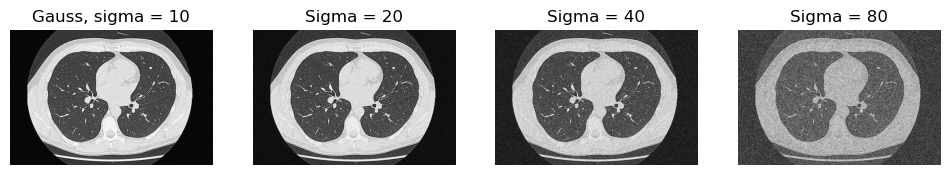

In [8]:
 for i in range(len(images)):
    fig, axes = plt.subplots(1, 4, figsize=(12, 12), sharex=False, sharey=True)
    ax = axes.ravel()

    ax[0].set_title("Gauss, sigma = 10")
    ax[0].imshow(gaussianNoise(images[i], 10), cmap='gray')

    ax[1].set_title("Sigma = 20")
    ax[1].imshow(gaussianNoise(images[i], 20), cmap='gray')

    ax[2].set_title("Sigma = 40")
    ax[2].imshow(gaussianNoise(images[i], 40), cmap='gray')

    ax[3].set_title("Sigma = 80")
    ax[3].imshow(gaussianNoise(images[i], 80), cmap='gray')

    for a in ax:
        a.set_axis_off()

    plt.show()

#### Salt and pepper noise

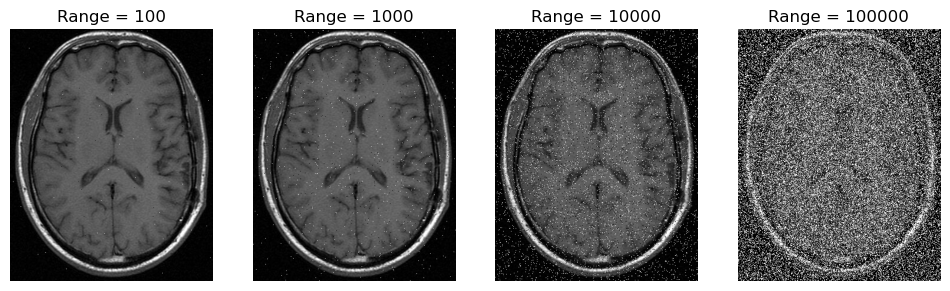

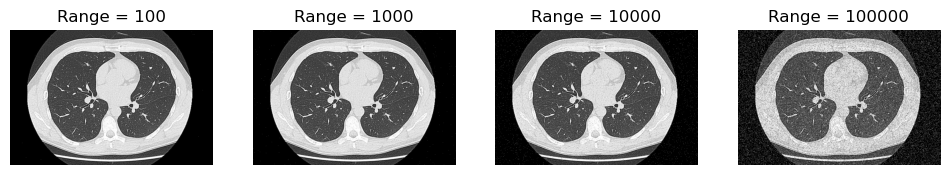

In [5]:
 for i in range(len(images)):
    fig, axes = plt.subplots(1, 4, figsize=(12, 12), sharex=False, sharey=True)
    ax = axes.ravel()
    
    ax[0].set_title("Range = 100")
    ax[0].imshow(saltAndPepperNoise(images[i], 100), cmap='gray')

    ax[1].set_title("Range = 1000")
    ax[1].imshow(saltAndPepperNoise(images[i], 1000), cmap='gray')

    ax[2].set_title("Range = 10000")
    ax[2].imshow(saltAndPepperNoise(images[i], 10000), cmap='gray')

    ax[3].set_title("Range = 100000")
    ax[3].imshow(saltAndPepperNoise(images[i], 100000), cmap='gray')
    
    for a in ax:
        a.set_axis_off()

    plt.show()


## NON-LOCAL MEANS FILTERING

As we have seen, Non-Local Means (NLM) method consists of filtering the image by weighted average of the
different pixels in the image based on their similarity to the original pixel.

You should evaluate this filtering algorithm with different images, noise types and different noise intensity.
You must look for the parameters that work best for each scenario, justify your choice and analyze the results
obtained. Finally, you should compare the filtering performance of this algorithm with standard smoothing
methods.

If you are going to use Python, the algorithm is already implemented in the denoise_nl_means function of the
skimage.restoration package.

In [11]:
from skimage.restoration import denoise_nl_means

#### NLM on gaussian noise

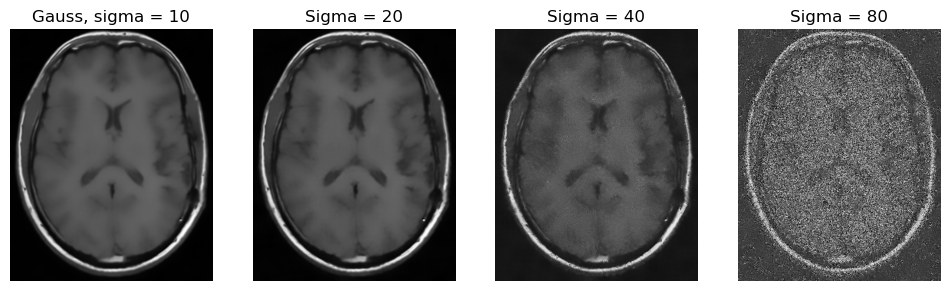

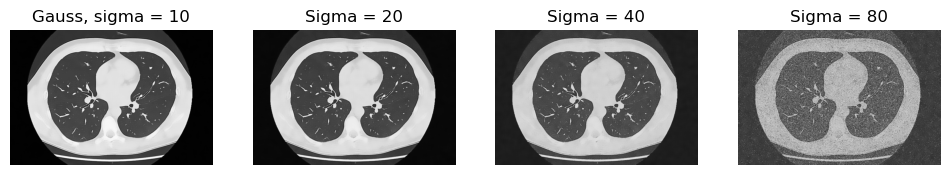

In [13]:
for i in range(len(images)):
    fig, axes = plt.subplots(1, 4, figsize=(12, 12), sharex=False, sharey=True)
    ax = axes.ravel()

    ax[0].set_title("Gauss, sigma = 10")
    ax[0].imshow(denoise_nl_means(gaussianNoise(images[i], 10)), cmap='gray')

    ax[1].set_title("Sigma = 20")
    ax[1].imshow(denoise_nl_means(gaussianNoise(images[i], 20)), cmap='gray')

    ax[2].set_title("Sigma = 40")
    ax[2].imshow(denoise_nl_means(gaussianNoise(images[i], 40)), cmap='gray')

    ax[3].set_title("Sigma = 80")
    ax[3].imshow(denoise_nl_means(gaussianNoise(images[i], 80)), cmap='gray')

    for a in ax:
        a.set_axis_off()

    plt.show()

#### NLM on salt and pepper noise

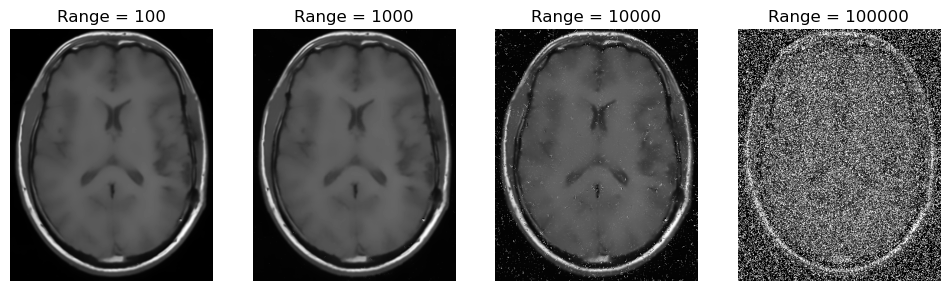

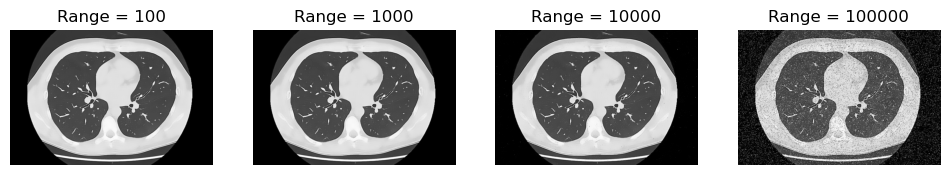

In [14]:
for i in range(len(images)):
    fig, axes = plt.subplots(1, 4, figsize=(12, 12), sharex=False, sharey=True)
    ax = axes.ravel()
    
    ax[0].set_title("Range = 100")
    ax[0].imshow(denoise_nl_means(saltAndPepperNoise(images[i], 100)), cmap='gray')

    ax[1].set_title("Range = 1000")
    ax[1].imshow(denoise_nl_means(saltAndPepperNoise(images[i], 1000)), cmap='gray')

    ax[2].set_title("Range = 10000")
    ax[2].imshow(denoise_nl_means(saltAndPepperNoise(images[i], 10000)), cmap='gray')

    ax[3].set_title("Range = 100000")
    ax[3].imshow(denoise_nl_means(saltAndPepperNoise(images[i], 100000)), cmap='gray')
    
    for a in ax:
        a.set_axis_off()

    plt.show()

## ANISOTROPIC FILTERING: PERONA AND MALIK

The goal of anisotropic filtering is to perform adaptive smoothing of the image based on its gradient. In this
way, what we want to achieve is a smaller smoothing in edge areas, and greater smoothing in homogeneous
areas.

As well as in the first exercise, you must evaluate this filtering algorithm with different types of noisy images
and different noise intensity. You should look for the parameters that work best with each of the image types
and justify your choice. Also compare the results with standard smoothing methods.

You will have to look for an implementation of this algorithm on the Internet

In [15]:
from medpy.filter.smoothing import anisotropic_diffusion

#### Anisotropic filtering on gaussian noise

#### Anisotropic on salt and pepper noise

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

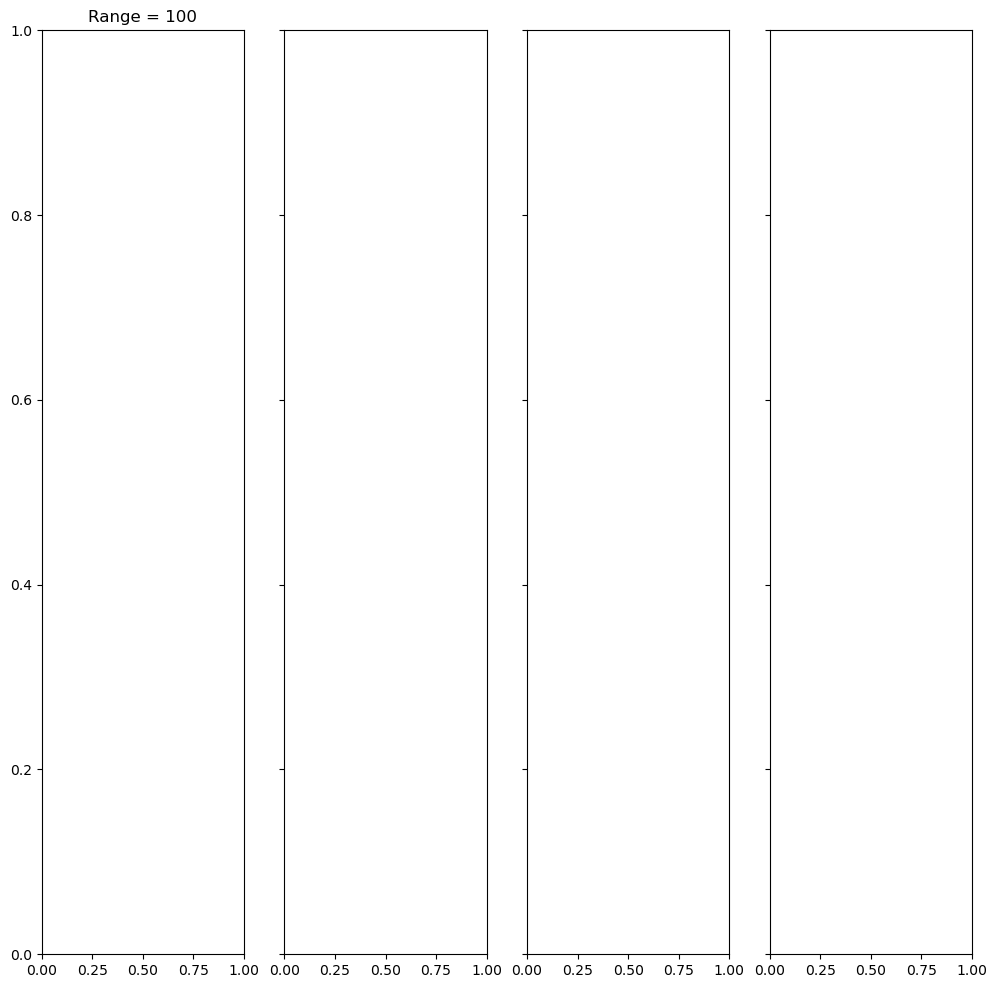

In [16]:
for i in range(len(images)):
    fig, axes = plt.subplots(1, 4, figsize=(12, 12), sharex=False, sharey=True)
    ax = axes.ravel()
    
    ax[0].set_title("Range = 100")
    ax[0].imshow(anisotropic_diffusion(saltAndPepperNoise(images[i], 100)), cmap='gray')

    ax[1].set_title("Range = 1000")
    ax[1].imshow(anisotropic_diffusion(saltAndPepperNoise(images[i], 1000)), cmap='gray')

    ax[2].set_title("Range = 10000")
    ax[2].imshow(anisotropic_diffusion(saltAndPepperNoise(images[i], 10000)), cmap='gray')

    ax[3].set_title("Range = 100000")
    ax[3].imshow(anisotropic_diffusion(saltAndPepperNoise(images[i], 100000)), cmap='gray')
    
    for a in ax:
        a.set_axis_off()

    plt.show()

## OTHER TYPES OF ADVANCED FILTERING

In this last exercise for this lab practice you must make a search of other types of advanced filtering methods
that are available in the literature. You will have to perform an in-depth explanation of a method you like, to
look for the code implementation (or to implement it if the code is not available), to evaluate the results it with the same images as in the previous exercise, and to compare its performance with the NLM, anisotropic
filtering, and standard smoothing methods.